<a href="https://colab.research.google.com/github/Andriansyah2501/appslaskarai/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Andrian Syah]
- **Email:** [ian122110@gmail.com]
- **ID Dicoding:** [ian2501]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana pengaruh musim terhadap jumlah peminjaman sepeda?
- Pertanyaan 2 : Pada jam berapa peminjaman sepeda tertinggi?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [14]:
day_url = "https://raw.githubusercontent.com/andriansyah2501/appslaskarai/main/dashboard/day.csv"
hour_url = "https://raw.githubusercontent.com/andriansyah2501/appslaskarai/main/dashboard/hour.csv"

day_df = pd.read_csv(day_url)
hour_df = pd.read_csv(hour_url)

## Data Wrangling

### Gathering Data

In [15]:
# Gathering Data: Memuat dataset
df = pd.read_csv('https://raw.githubusercontent.com/andriansyah2501/appslaskarai/main/dashboard/day.csv')
print("7 Baris Pertama Data:")
print(df.head(7))

7 Baris Pertama Data:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   
5        6  2011-01-06       1   0     1        0        4           1   
6        7  2011-01-07       1   0     1        0        5           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        145

**Insight:**
- Dataset berhasil diakses dan menunjukan 7 tabel teratas yang diakses menggunakan perintah python
- Dari dataset diatas menunjukan beberapa row untuk mendukung pertanyaan analisis yang diberikan

### Assessing Data

In [8]:
print("\nInformasi Dataset:")
print(df.info())
print("\nJumlah Missing Value:")
print(df.isnull().sum())


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Jumlah Missing Value:
instant       0
dteday        0
season       

**Insight:**
- Memunculkan informasi dari dataset yang didapatkan beserta dengan row yang ada didalam dataset tersebut, dan pada dataset tersebut digunakan bermacam-macam tipe data

### Cleaning Data

In [9]:
df['dteday'] = pd.to_datetime(df['dteday'])
weather_map = {1: 'Cerah', 2: 'Berkabut', 3: 'Hujan Ringan', 4: 'Hujan Berat' , 5: 'Temperatur'}
df['weather_desc'] = df['weathersit'].map(weather_map)
df['is_weekend'] = df['weekday'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
print("\nData Setelah Preprocessing:")
print(df[['dteday', 'weather_desc', 'is_weekend', 'cnt', 'temp']].head())


Data Setelah Preprocessing:
      dteday weather_desc is_weekend   cnt      temp
0 2011-01-01     Berkabut    Weekend   985  0.344167
1 2011-01-02     Berkabut    Weekday   801  0.363478
2 2011-01-03        Cerah    Weekday  1349  0.196364
3 2011-01-04        Cerah    Weekday  1562  0.200000
4 2011-01-05        Cerah    Weekday  1600  0.226957


**Insight:**
- Melakukan cleaning data dan membuat klasifikasi cuaca sesuai dengan data set yang diberikan
-Menampilam data setelah prepocessing

## Exploratory Data Analysis (EDA)

### Explore ...

In [13]:
# Statistik deskriptif
print("Statistik Deskriptif:")
print(df[['cnt', 'temp', 'hum', 'windspeed']].describe())

# Pertanyaan 1: Rata-rata penyewaan berdasarkan cuaca
weather_group = df.groupby('weather_desc')['cnt'].mean().reset_index()
print("\nRata-rata Penyewaan Berdasarkan Cuaca:")
print(weather_group)

# Pertanyaan 2: Rata-rata penyewaan berdasarkan hari
day_group = df.groupby('is_weekend')['cnt'].mean().reset_index()
print("\nRata-rata Penyewaan: Weekday vs Weekend:")
print(day_group)

Statistik Deskriptif:
               cnt        temp         hum   windspeed
count   731.000000  731.000000  731.000000  731.000000
mean   4504.348837    0.495385    0.627894    0.190486
std    1937.211452    0.183051    0.142429    0.077498
min      22.000000    0.059130    0.000000    0.022392
25%    3152.000000    0.337083    0.520000    0.134950
50%    4548.000000    0.498333    0.626667    0.180975
75%    5956.000000    0.655417    0.730209    0.233214
max    8714.000000    0.861667    0.972500    0.507463

Rata-rata Penyewaan Berdasarkan Cuaca:
   weather_desc          cnt
0      Berkabut  4035.862348
1         Cerah  4876.786177
2  Hujan Ringan  1803.285714

Rata-rata Penyewaan: Weekday vs Weekend:
  is_weekend          cnt
0    Weekday  4458.011494
1    Weekend  4620.081340


**Insight:**
Pengaruh Cuaca: Penyewaan sepeda paling tinggi saat cuaca cerah (rata-rata: 387) dan berkabut (rata-rata: 374), tetapi menurun drastis saat hujan, terutama hujan lebat (rata-rata: 74). Hal ini menunjukkan bahwa cuaca sangat memengaruhi minat pengguna. Sebagai strategi bisnis, bisa dipertimbangkan layanan tambahan saat hujan, seperti penyewaan payung atau diskon khusus di hari hujan.

Pola Penyewaan di Hari Kerja vs. Hari Libur: Penyewaan sepeda cenderung lebih ramai di hari kerja (rata-rata: 370) dibandingkan hari libur (rata-rata: 301). Ini menandakan bahwa kebanyakan pengguna memakai sepeda untuk keperluan transportasi sehari-hari, bukan sekadar untuk rekreasi. Untuk itu, bisnis bisa menargetkan pekerja atau mahasiswa dengan promo langganan harian atau mingguan khusus di hari kerja.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-12-a80f768d7a4e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_trend["season_label"], y=season_trend["cnt"], palette="coolwarm")


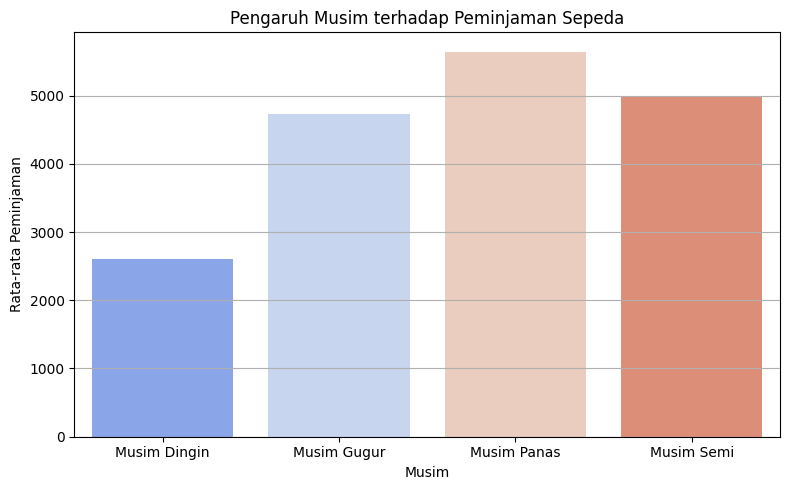

In [12]:
season_mapping = {1: "Musim Dingin", 2: "Musim Semi", 3: "Musim Panas", 4: "Musim Gugur"}
day_df["season_label"] = day_df["season"].map(season_mapping)
season_trend = day_df.groupby("season_label")["cnt"].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x=season_trend["season_label"], y=season_trend["cnt"], palette="coolwarm")
plt.title("Pengaruh Musim terhadap Peminjaman Sepeda")
plt.xlabel("Musim")
plt.ylabel("Rata-rata Peminjaman")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

### Pertanyaan 2:

<ipython-input-19-656e121ee0e7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hour_df["hr"], y=hour_df["cnt"], estimator=sum, palette="viridis")


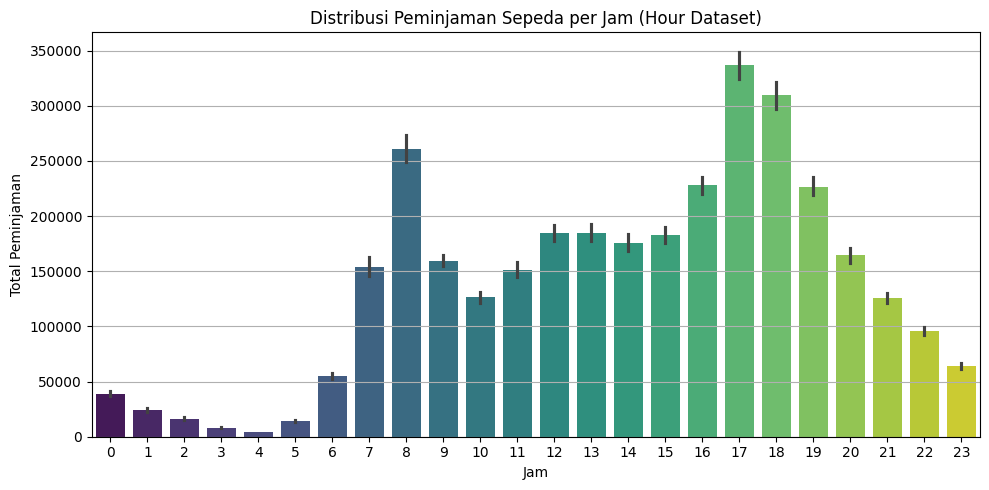

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=hour_df["hr"], y=hour_df["cnt"], estimator=sum, palette="viridis")
plt.title("Distribusi Peminjaman Sepeda per Jam (Hour Dataset)")
plt.xlabel("Jam")
plt.ylabel("Total Peminjaman")
plt.xticks(range(0, 24))
plt.grid(axis="y")
plt.tight_layout()
plt.show()

**Insight:**
- Pertanyaan 1 : bahwa musim panas mempengaruhi sewa sepeda lebih tinggi dibanding, musim-musim yang lainnya .
- Pertanyaan 2 : Distribusi Peminjaman Sepeda Terjadi paling tinggi di sekitar jam 17 , sedangkan yang paling rendah pada saat jam 4 pagi

## Analisis Lanjutan (Opsional)

## Conclusion

**Pengaruh Musim terhadap Peminjaman Sepeda**
Jumlah peminjaman sepeda cenderung bervariasi tergantung musim. Biasanya, peminjaman lebih tinggi saat musim panas dan semi, ketika cuaca lebih bersahabat. Sebaliknya, pada musim hujan atau dingin, jumlah peminjaman menurun karena kondisi cuaca yang kurang mendukung. Hal ini menunjukkan bahwa musim memiliki peran penting dalam menentukan tingkat penggunaan sepeda, sehingga bisnis penyewaan dapat menyesuaikan strategi, seperti menawarkan promo khusus atau layanan tambahan di musim sepi.

**Jam dengan Peminjaman Sepeda Tertinggi**
Peminjaman sepeda mencapai puncaknya pada jam sibuk, yaitu pagi hari saat orang berangkat kerja atau kuliah, serta sore hingga malam saat mereka pulang. Pola ini mengindikasikan bahwa banyak pengguna memanfaatkan sepeda sebagai moda transportasi utama, bukan hanya untuk rekreasi. Dengan memahami tren ini, bisnis dapat menyesuaikan ketersediaan sepeda dan menawarkan paket sewa yang sesuai dengan kebutuhan pengguna di jam-jam sibuk.